In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sn
from sklearn.feature_selection import VarianceThreshold
from sklearn.multioutput import MultiOutputClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import multilabel_confusion_matrix,classification_report

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('malaria_dataset.csv')
df

,SL.NO,IP NO.,Plasmodium falciparum,Plasmodium malariae,Plasmodium vivax,"FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)",HEADACHE,BODYACHE,VOMITING,CHILLS,...,"Appetite(Good-0, Abnormal=1)","Sleep(Normal=0, Abnormal =1)",Skin Rashes,Malaria Details,Medicines,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Age,Gender,Place,Date of Admission,Date of Discharge
1,1.0,34567.0,1,0,0,3-4D,1-2D,0,0,1,...,0,0,1.0,Positive - Ring forms of pl. falcipharum(++) a...,Inj. Arinatum 120mg IV STAT(3 Doses); Larinate...,#REF!,#REF!,#REF!,#REF!,#REF!
2,2.0,507453.0,0,0,1,2-5D,1-5D,1,0,1,...,0,0,0.0,POSITIVE.RING FORMS AND GAMETOCYTES OF PL.FALC...,"TAB.LARNINATE SP KIT,TAB.MALIRID DS OD,INJ.ARI...",#REF!,#REF!,#REF!,#REF!,#REF!
3,3.0,502278.0,1,0,0,1-5D,1,0,0,1,...,0,0,0.0,POSITIVE.RING FORM OF PL.FACIPARUM[+],"TAB.JANUVIA 10MG 0-0-1,TAB.GUMEFINE M2 1 0-0-1",#REF!,#REF!,#REF!,#REF!,#REF!
4,4.0,489902.0,1,1,0,3-3D,1-3D,1,0,1,...,0,0,0.0,positive -ring forms of p.vivax(+) and ring fo...,"T.larinate sp kit ,T.Malarid ds 0-0-1",#REF!,#REF!,#REF!,#REF!,#REF!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494.0,669753.0,0,0,0,4D,0,1,0,1,...,1,0,0.0,positive,"IV fluids DNS 75ml/hr, Inj. Arinatum 120mg, In...",#REF!,#REF!,#REF!,#REF!,#REF!
495,495.0,669759.0,0,0,0,2D,0,0,0,1,...,1,0,0.0,positive,"Inj. Emal 1amp im od * 3 days, Inj. Rabimor 20...",#REF!,#REF!,#REF!,#REF!,#REF!
496,496.0,669763.0,0,0,0,4D,1,0,0,1,...,1,0,0.0,positive,"Inj. Falcigo 120mg, T.Larinate Sp kit, T. Dolo...",#REF!,#REF!,#REF!,#REF!,#REF!
497,497.0,669837.0,0,0,0,6D,0,0,0,1,...,1,0,0.0,positive,"IVF DNS @ 125ml/hr, Inj. Emeset 4mg iv TID, T....",#REF!,#REF!,#REF!,#REF!,#REF!


In [4]:
df.shape

(499, 58)

In [5]:
df.columns

Index(['SL.NO', 'IP NO. ', 'Plasmodium falciparum', 'Plasmodium malariae',
       'Plasmodium vivax', 'FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)',
       'HEADACHE', 'BODYACHE', 'VOMITING', 'CHILLS', 'COUGH',
       'ABDOMINAL DISCOMFORT', 'BREATHELESSNESS',
       'LOOSE STOOL(STOMACH PROBLEM)', 'GENERALIZED WEEKNESS',
       'PUFINESS in the FACE', 'RUNNING NOSE', 'THROAT PAIN',
       'BLEEDING MANIFESTATION', 'RIGORS', 'DIABETICS', 'HEART PROBLEM',
       'HYPERTENSION', 'DECREASED APPETITE', 'NAUSEA', 'SORE THROAT',
       'URINAL VARIATION', 'EAR DISCHARGE', 'TB', 'ASHTHMA', 'EPILEPSY',
       'BP(mmhg)', 'PULSE(bpm)', 'RR(breaths/min)', 'TEMP(f)', 'pallor',
       'icterus', 'clubbing', 'cynosis', 'lymphadenopathy', 'pedel oedema',
       'burning micturition', 'Diet-Mixed', 'Previous History of Malaria',
       'PREVIOUS HISTORY OF DENGUE', 'Bronchial', 'DROWSY', 'DISCOMFORT',
       'Appetite(Good-0, Abnormal=1)', 'Sleep(Normal=0, Abnormal =1)',
       'Skin Rashes', 'Ma

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 58 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   SL.NO                                            498 non-null    float64
 1   IP NO.                                           468 non-null    float64
 2   Plasmodium falciparum                            498 non-null    object 
 3   Plasmodium malariae                              494 non-null    object 
 4   Plasmodium vivax                                 496 non-null    object 
 5   FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)  497 non-null    object 
 6   HEADACHE                                         498 non-null    object 
 7   BODYACHE                                         498 non-null    object 
 8   VOMITING                                         497 non-null    object 
 9   CHILLS                          

In [7]:
df1=df.iloc[:,2:53]
df1

,Plasmodium falciparum,Plasmodium malariae,Plasmodium vivax,"FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)",HEADACHE,BODYACHE,VOMITING,CHILLS,COUGH,ABDOMINAL DISCOMFORT,...,Previous History of Malaria,PREVIOUS HISTORY OF DENGUE,Bronchial,DROWSY,DISCOMFORT,"Appetite(Good-0, Abnormal=1)","Sleep(Normal=0, Abnormal =1)",Skin Rashes,Malaria Details,Medicines
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,3-4D,1-2D,0,0,1,1,0.0,...,0,0,1.0,1.0,1.0,0,0,1.0,Positive - Ring forms of pl. falcipharum(++) a...,Inj. Arinatum 120mg IV STAT(3 Doses); Larinate...
2,0,0,1,2-5D,1-5D,1,0,1,0,0.0,...,0,0,0.0,0.0,1.0,0,0,0.0,POSITIVE.RING FORMS AND GAMETOCYTES OF PL.FALC...,"TAB.LARNINATE SP KIT,TAB.MALIRID DS OD,INJ.ARI..."
3,1,0,0,1-5D,1,0,0,1,0,0.0,...,0,0,0.0,0.0,0.0,0,0,0.0,POSITIVE.RING FORM OF PL.FACIPARUM[+],"TAB.JANUVIA 10MG 0-0-1,TAB.GUMEFINE M2 1 0-0-1"
4,1,1,0,3-3D,1-3D,1,0,1,0,0.0,...,0,0,0.0,0.0,0.0,0,0,0.0,positive -ring forms of p.vivax(+) and ring fo...,"T.larinate sp kit ,T.Malarid ds 0-0-1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0,0,0,4D,0,1,0,1,0,0.0,...,0,0,0.0,0.0,0.0,1,0,0.0,positive,"IV fluids DNS 75ml/hr, Inj. Arinatum 120mg, In..."
495,0,0,0,2D,0,0,0,1,0,0.0,...,0,0,0.0,0.0,0.0,1,0,0.0,positive,"Inj. Emal 1amp im od * 3 days, Inj. Rabimor 20..."
496,0,0,0,4D,1,0,0,1,0,0.0,...,0,0,0.0,0.0,0.0,1,0,0.0,positive,"Inj. Falcigo 120mg, T.Larinate Sp kit, T. Dolo..."
497,0,0,0,6D,0,0,0,1,0,0.0,...,0,0,0.0,0.0,0.0,1,0,0.0,positive,"IVF DNS @ 125ml/hr, Inj. Emeset 4mg iv TID, T...."


In [8]:
df1.shape

(499, 51)

In [9]:
df1.nunique()

Plasmodium falciparum                                3
Plasmodium malariae                                  4
Plasmodium vivax                                     3
FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)     66
HEADACHE                                            25
BODYACHE                                             7
VOMITING                                             9
CHILLS                                               4
COUGH                                                7
ABDOMINAL DISCOMFORT                                 3
BREATHELESSNESS                                      2
LOOSE STOOL(STOMACH PROBLEM)                         6
GENERALIZED WEEKNESS                                 7
PUFINESS in the FACE                                 2
RUNNING NOSE                                         2
THROAT PAIN                                          2
BLEEDING MANIFESTATION                               2
RIGORS                                               2
DIABETICS 

In [10]:
df1.isna().sum()

Plasmodium falciparum                               1
Plasmodium malariae                                 5
Plasmodium vivax                                    3
FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)     2
HEADACHE                                            1
BODYACHE                                            1
VOMITING                                            2
CHILLS                                              1
COUGH                                               1
ABDOMINAL DISCOMFORT                                2
BREATHELESSNESS                                     5
LOOSE STOOL(STOMACH PROBLEM)                        1
GENERALIZED WEEKNESS                                7
PUFINESS in the FACE                                3
RUNNING NOSE                                        1
THROAT PAIN                                         2
BLEEDING MANIFESTATION                              3
RIGORS                                              1
DIABETICS                   

In [11]:
df1.dropna(inplace=True)
df1.isna().sum()

Plasmodium falciparum                              0
Plasmodium malariae                                0
Plasmodium vivax                                   0
FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)    0
HEADACHE                                           0
BODYACHE                                           0
VOMITING                                           0
CHILLS                                             0
COUGH                                              0
ABDOMINAL DISCOMFORT                               0
BREATHELESSNESS                                    0
LOOSE STOOL(STOMACH PROBLEM)                       0
GENERALIZED WEEKNESS                               0
PUFINESS in the FACE                               0
RUNNING NOSE                                       0
THROAT PAIN                                        0
BLEEDING MANIFESTATION                             0
RIGORS                                             0
DIABETICS                                     

In [12]:
df1.describe()

,ABDOMINAL DISCOMFORT,BREATHELESSNESS,RUNNING NOSE,THROAT PAIN,BLEEDING MANIFESTATION,RIGORS,DIABETICS,HEART PROBLEM,HYPERTENSION,DECREASED APPETITE,...,SORE THROAT,URINAL VARIATION,EAR DISCHARGE,TB,ASHTHMA,EPILEPSY,Bronchial,DROWSY,DISCOMFORT,Skin Rashes
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,440.000000,440.000000,440.000000,440.000000,440.000000,440.0,440.000000,440.000000,440.000000,440.000000
mean,0.077273,0.038636,0.015909,0.020455,0.013636,0.577273,0.045455,0.009091,0.065909,0.122727,...,0.004545,0.031818,0.040909,0.009091,0.020455,0.0,0.018182,0.015909,0.054545,0.034091
std,0.283859,0.192946,0.125266,0.141710,0.116108,0.494555,0.208536,0.095020,0.248406,0.328497,...,0.067343,0.175716,0.198305,0.095020,0.141710,0.0,0.133761,0.125266,0.227349,0.181669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [13]:
df1.nunique()

Plasmodium falciparum                                3
Plasmodium malariae                                  4
Plasmodium vivax                                     3
FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)     63
HEADACHE                                            23
BODYACHE                                             7
VOMITING                                             9
CHILLS                                               3
COUGH                                                6
ABDOMINAL DISCOMFORT                                 3
BREATHELESSNESS                                      2
LOOSE STOOL(STOMACH PROBLEM)                         6
GENERALIZED WEEKNESS                                 6
PUFINESS in the FACE                                 2
RUNNING NOSE                                         2
THROAT PAIN                                          2
BLEEDING MANIFESTATION                               2
RIGORS                                               2
DIABETICS 

In [14]:
df2=df1.drop(['EPILEPSY'],axis='columns')
df2.nunique()

Plasmodium falciparum                                3
Plasmodium malariae                                  4
Plasmodium vivax                                     3
FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)     63
HEADACHE                                            23
BODYACHE                                             7
VOMITING                                             9
CHILLS                                               3
COUGH                                                6
ABDOMINAL DISCOMFORT                                 3
BREATHELESSNESS                                      2
LOOSE STOOL(STOMACH PROBLEM)                         6
GENERALIZED WEEKNESS                                 6
PUFINESS in the FACE                                 2
RUNNING NOSE                                         2
THROAT PAIN                                          2
BLEEDING MANIFESTATION                               2
RIGORS                                               2
DIABETICS 

In [15]:
df2['Plasmodium falciparum'].value_counts()

Plasmodium falciparum
0    240
1    199
_      1
Name: count, dtype: int64

In [16]:
df2[df2['Plasmodium falciparum']=='_']

,Plasmodium falciparum,Plasmodium malariae,Plasmodium vivax,"FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)",HEADACHE,BODYACHE,VOMITING,CHILLS,COUGH,ABDOMINAL DISCOMFORT,...,Previous History of Malaria,PREVIOUS HISTORY OF DENGUE,Bronchial,DROWSY,DISCOMFORT,"Appetite(Good-0, Abnormal=1)","Sleep(Normal=0, Abnormal =1)",Skin Rashes,Malaria Details,Medicines
151,_,_,_,3,0,1,0,1,0,0.0,...,0,0,0.0,0.0,0.0,0,1,0.0,mixed malaria positive;patients seria platelet...,LARNATE SP KIT;TAB PAN 40MG 1-0-0;DOLO650MG 1-...


In [17]:
df2=df2[df2['Plasmodium falciparum']!='_']
# imputer=IterativeImputer()
# df2['Plasmodium falciparum']=imputer.fit_transform(df2[['Plasmodium falciparum']])
# df2['Plasmodium falciparum'].isna().any()
df2['Plasmodium falciparum'].value_counts()
df2['Plasmodium falciparum']=df2['Plasmodium falciparum'].astype(int)
df2['Plasmodium falciparum'].dtype

dtype('int32')

In [18]:
df2['Plasmodium malariae'].value_counts()

Plasmodium malariae
0          360
1           50
#ERROR!     29
Name: count, dtype: int64

In [19]:
df2=df2[df2['Plasmodium malariae']!='#ERROR!']
class_0,class_1=df2['Plasmodium malariae'].value_counts()


In [20]:
df2['Plasmodium vivax'].value_counts() 
df2['Plasmodium vivax']=df2['Plasmodium vivax'].astype(int)
df2['Plasmodium vivax'].dtype
df2['Plasmodium malariae']=df2['Plasmodium malariae'].astype(int)

In [21]:
df2=df2[df2['FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)']!='-']

In [22]:
df2['FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)'].unique()

array(['3-4D', '2-5D', '1-5D', '3-3D', '1-3D', '3-5D', '3-7D', '2-3D',
       '3,2-1D', '3D', '3,2-2D', '3,2-4D', '3-3D,2-3D', '2-1D', '1-7D',
       '2-7D,3-7D', '3-10D', '2-15D', '5D', '1-2D', '3', '3; 3D', '2; 3D',
       '1; 15D', '3; 4D', '3; 7D', '3; 5D', '3; 2D', '2', '1', '1W',
       '`1W', '6D', '4D', '0', '1-10D', '1-4D', '0D', '3-2W', '3-6D',
       '3-1W', '2-1W', '1-15D', '3-1D', '2-2D', '1-6D', '3-2D', '2-7D',
       '3(1W)', '1M', '1D', '10D', '2D', '7D', '3,2-3D', '1-1D', '2-4D',
       '1,2-2D', '2,1-5D', '3,2-7D', '12D', '8D'], dtype=object)

In [23]:
import re
def function_convert_days(input_string):

    matched=[int(matching.group())for matching in re.finditer(r'\d+',input_string) ]
#     print(matched)
    if 'D' in input_string:
#       print(matched)
        maxx=max(matched) *1 
    elif 'W' in input_string:
         maxx=max(matched)*7
    elif 'M' in input_string:
         maxx=max(matched)*30
    else:
        return max(matched)
    return maxx
# a=function_convert_days('1-15D')
# a
df2['FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)']=df2['FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)'].apply(function_convert_days)        

In [24]:
df2['FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)'].unique()

array([ 4,  5,  3,  7,  2, 10, 15,  1,  6,  0, 21, 14, 30, 12,  8],
      dtype=int64)

In [25]:
df2['FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)']=df2['FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)'].astype(int)
df2['FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)'].dtype

dtype('int32')

In [26]:
df2.groupby('FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)')['FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)'].agg('count')

FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)
0       3
1      11
2      64
3     137
4      69
5      48
6      10
7      46
8       1
10      9
12      1
14      1
15      3
21      4
30      2
Name: FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1), dtype: int64

In [27]:
df2['HEADACHE'].unique()

array(['1-2D', '1-5D', '1', '1-3D', '0', '_', '1D', '3D', '5D', '15D',
       '4D', '2D', '3-4D', '4-5D', '2-3D', '-', '1W', '0D', '1-10D',
       '1-6D', '1-4D', '1-1W', '1-15D'], dtype=object)

In [28]:
df2=df2[df2['HEADACHE']!='-']
df2=df2[df2['HEADACHE']!='_']
df2['HEADACHE']=df2['HEADACHE'].apply(function_convert_days)
df2['HEADACHE'].unique()
df2['HEADACHE']=df2['HEADACHE'].astype(int)
df2['HEADACHE'].dtype

dtype('int32')

In [29]:
df2['BODYACHE'].unique()
df2['BODYACHE']=df2['BODYACHE'].apply(function_convert_days)
df2['BODYACHE']=df2['BODYACHE'].astype(int)
df2['BODYACHE'].dtype


dtype('int32')

In [30]:
df2['VOMITING'].unique()
df2['VOMITING']=df2['VOMITING'].apply(function_convert_days)
df2['VOMITING']=df2['VOMITING'].astype(int)
df2['VOMITING'].dtype

dtype('int32')

In [31]:
df2['CHILLS'].value_counts()
df2['CHILLS']=df2['CHILLS'].astype(int)
df2['CHILLS'].dtype

dtype('int32')

In [32]:
df2['COUGH'].unique()
df2['COUGH']=df2['COUGH'].apply(function_convert_days)
df2['COUGH']=df2['COUGH'].astype(int)

In [33]:
df2['ABDOMINAL DISCOMFORT'].unique()
df2['ABDOMINAL DISCOMFORT'].dtype
df2['ABDOMINAL DISCOMFORT'].unique()

array([0., 1., 2.])

In [34]:
df2['ABDOMINAL DISCOMFORT'].value_counts()
df2['ABDOMINAL DISCOMFORT']=df2['ABDOMINAL DISCOMFORT'].astype(int)

In [35]:
df2['BREATHELESSNESS'].unique()
df2['BREATHELESSNESS'].value_counts()
df2['BREATHELESSNESS'].dtype
df2['BREATHELESSNESS']=df2['BREATHELESSNESS'].astype(int)

In [36]:
df2['LOOSE STOOL(STOMACH PROBLEM)'].value_counts()
df2=df2[df2['LOOSE STOOL(STOMACH PROBLEM)']!='__']
df2['LOOSE STOOL(STOMACH PROBLEM)']=df2['LOOSE STOOL(STOMACH PROBLEM)'].apply(function_convert_days)
df2['LOOSE STOOL(STOMACH PROBLEM)'].value_counts()
df2['LOOSE STOOL(STOMACH PROBLEM)']=df2['LOOSE STOOL(STOMACH PROBLEM)'].astype(int)

In [37]:
df2['GENERALIZED WEEKNESS'].unique()
df2['GENERALIZED WEEKNESS']=df2['GENERALIZED WEEKNESS'].apply(function_convert_days)
df2['GENERALIZED WEEKNESS'].value_counts()
df2['GENERALIZED WEEKNESS']=df2['GENERALIZED WEEKNESS'].astype(int)

In [38]:
df2['PUFINESS in the FACE'].unique()
df2.groupby('PUFINESS in the FACE')['PUFINESS in the FACE'].agg('count')
df2=df2.drop(['PUFINESS in the FACE'],axis='columns')

In [39]:
df2['RUNNING NOSE'].unique()
df2['RUNNING NOSE'].value_counts()
df2['RUNNING NOSE'].dtype
df2['RUNNING NOSE']=df2['RUNNING NOSE'].astype(int)

In [40]:
df2['THROAT PAIN'].unique()
df2['THROAT PAIN'].value_counts()
df2['THROAT PAIN'].dtype
df2['THROAT PAIN']=df2['THROAT PAIN'].astype(int)

In [41]:
df2['BLEEDING MANIFESTATION'].unique()
df2['BLEEDING MANIFESTATION'].value_counts()
df2['BLEEDING MANIFESTATION'].dtype
df2['BLEEDING MANIFESTATION']=df2['BLEEDING MANIFESTATION'].astype(int)

In [42]:
df2['RIGORS'].unique()
df2['RIGORS'].dtype
df2['RIGORS'].unique()
df2['RIGORS']=df2['RIGORS'].astype(int)

In [43]:
df2['NAUSEA'].unique()
df2['NAUSEA'].value_counts()
df2['NAUSEA'].dtype
df2['NAUSEA']=df2['NAUSEA'].astype(int)

In [44]:
df2['SORE THROAT'].unique()
df2['SORE THROAT'].dtype
df2['SORE THROAT']=df2['SORE THROAT'].astype(int)

In [45]:
df2['URINAL VARIATION'].unique()
df2['URINAL VARIATION'].dtype
df2['URINAL VARIATION']=df2['URINAL VARIATION'].astype(int)

In [46]:
df2['EAR DISCHARGE'].unique()
df2['EAR DISCHARGE'].dtype
df2['EAR DISCHARGE']=df2['EAR DISCHARGE'].astype(int)

In [47]:
df2['TB'].unique()
df2['TB'].dtype
df2['TB'].unique()
df2['TB']=df2['TB'].astype(int)

In [48]:
df2['ASHTHMA'].dtype
df2['ASHTHMA'].unique()
df2['ASHTHMA']=df2['ASHTHMA'].astype(int)

In [49]:
df2['DECREASED APPETITE'].unique()
df2['DECREASED APPETITE'].dtype
df2['DECREASED APPETITE'].unique()
df2['DECREASED APPETITE']=df2['DECREASED APPETITE'].astype(int)

In [50]:
df2['HYPERTENSION'].unique()
df2['HYPERTENSION'].dtype
df2['HYPERTENSION']=df2['HYPERTENSION'].astype(int)

In [51]:
df2['DIABETICS'].unique()
df2['DIABETICS']=df2['DIABETICS'].astype(int)

In [52]:
df2['HEART PROBLEM'].unique()
df2['HEART PROBLEM']=df2['HEART PROBLEM'].astype(int)

In [53]:
df2['BP(mmhg)'].unique()

array(['130/90', '110/80', '130/80', '120/80', '80/44', '110/70',
       '100/60', '160/100', '120/70', '140/70', '100/70', '90/50',
       '140/100', '150/90', '_', '120/64', '80/50', '160/70', '-',
       '120/90mmhg', '120/80mmhg', '110/70mmhg', '100/66', '90/70',
       '170/100', '140/80', '102/64', '140/90', '130/70', '170/110',
       '110/60', 'Dec-80', '170/90', '120/100', '120/90', '90/60',
       '100/80', '80/60', '70/50', '110/78', '116/80'], dtype=object)

In [54]:
df2=df2[df2['BP(mmhg)']!='-']
df2=df2[df2['BP(mmhg)']!='_']
df2=df2[df2['BP(mmhg)']!='Dec-80']
df2['BP(mmhg)'].unique()

array(['130/90', '110/80', '130/80', '120/80', '80/44', '110/70',
       '100/60', '160/100', '120/70', '140/70', '100/70', '90/50',
       '140/100', '150/90', '120/64', '80/50', '160/70', '120/90mmhg',
       '120/80mmhg', '110/70mmhg', '100/66', '90/70', '170/100', '140/80',
       '102/64', '140/90', '130/70', '170/110', '110/60', '170/90',
       '120/100', '120/90', '90/60', '100/80', '80/60', '70/50', '110/78',
       '116/80'], dtype=object)

In [55]:
def function_bp(x):
    if pd.isna(x):
        return np.nan
    bp=x.split('/')
    sys=int(bp[0])
    dia=int(bp[1][0:2])
    if sys<120 and dia<80:
        return 0   #normal
    elif sys<130 and dia<80:
        return 1   #elevated
    elif sys<140 or dia<90:
        return 2 #hypertensionstage1
    elif sys<=180 or dia>=90:
        return 3   #hypertensionstage2
    elif sys>180 and dia>120:
        return 4   #hypertensionstage3
df2['BP(mmhg)']=df2['BP(mmhg)'].apply(function_bp)


In [56]:
df2['BP(mmhg)'].unique()

array([2, 0, 1, 3], dtype=int64)

In [57]:
df2=df2[df2['PULSE(bpm)']!='-']
df2=df2[df2['PULSE(bpm)']!='_']

In [58]:
df2['PULSE(bpm)'].unique()

array(['82', '68', '74/min', '96beats/min', '100/min', '130', '88', '89',
       '84', '78', '86', '80', '74', '106', '90', '98', '70', '120',
       '78/MIN', '60', '76', '94', '108', '80bpm', '72/min', '76bpm',
       '75bpm', '84bpm', '72', '107', '102', '100', '110', '82B', '56',
       '104', '96', '77', '62', '92', '105', '66', '115', '135', '54',
       '38', '116'], dtype=object)

In [59]:
import re
def function_pulse(x):
    a=re.compile('[0-9]{3}/[a-z]{3}')
    b=re.compile('[0-9]{2}/[a-z]{3}|[0-9]{2}/[A-Z]{3}')
    c=re.compile('[0-9]{2}[beats]/[a-z]{3}')
    d=re.compile('[0-9]{2}[a-z]{3}')
    e=re.compile('[0-9]{2}[A-Z]')
    if a.match(x):
        return x[0:3]
    if b.match(x):
        return x[0:2]
    if c.match(x):
        return x[0:2]
    if d.match(x):
        return x[0:2]
    if e.match(x):
        return x[0:2]
    else:
        return x
df2['PULSE(bpm)']=df2['PULSE(bpm)'].apply(function_pulse)

In [60]:
df2['PULSE(bpm)'].unique()

array(['82', '68', '74', '96', '100', '130', '88', '89', '84', '78', '86',
       '80', '106', '90', '98', '70', '120', '60', '76', '94', '108',
       '72', '75', '107', '102', '110', '56', '104', '77', '62', '92',
       '105', '66', '115', '135', '54', '38', '116'], dtype=object)

In [61]:
df2['PULSE(bpm)']=df2['PULSE(bpm)'].astype(int)

In [62]:
df2['RR(breaths/min)'].unique()

array(['14', '14/MIN', '18 CYCLES/MIN', '20/min', '18cycles/min',
       '26/min', '24/min', '18', '16', '15', '26', '22', '20', '     _',
       '28', '24', '30', '20/MIN', '160', '18CYCLES', '-', '18/min',
       '16cpm', '18CYCLE/MIN', '16/min', '17', '12', '_', '13', '19'],
      dtype=object)

In [63]:
df2=df2[df2['RR(breaths/min)']!='-']
df2=df2[df2['RR(breaths/min)']!='_']
df2=df2[df2['RR(breaths/min)']!='     _']

In [64]:
def function_RR(x):
    list1=x.split('/')
    return list1[0][0:2]
df2['RR(breaths/min)']=df2['RR(breaths/min)'].apply(function_RR)

In [65]:
df2['RR(breaths/min)'].unique()

array(['14', '18', '20', '26', '24', '16', '15', '22', '28', '30', '17',
       '12', '13', '19'], dtype=object)

In [66]:
df2['RR(breaths/min)']=df2['RR(breaths/min)'].astype(int)

In [67]:
df2[df2['TEMP(f)']=='febrile']

,Plasmodium falciparum,Plasmodium malariae,Plasmodium vivax,"FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)",HEADACHE,BODYACHE,VOMITING,CHILLS,COUGH,ABDOMINAL DISCOMFORT,...,Previous History of Malaria,PREVIOUS HISTORY OF DENGUE,Bronchial,DROWSY,DISCOMFORT,"Appetite(Good-0, Abnormal=1)","Sleep(Normal=0, Abnormal =1)",Skin Rashes,Malaria Details,Medicines
4,1,1,0,3,3,1,0,1,0,0,...,0,0,0.0,0.0,0.0,0,0,0.0,positive -ring forms of p.vivax(+) and ring fo...,"T.larinate sp kit ,T.Malarid ds 0-0-1"
16,0,0,0,3,1,1,0,1,0,1,...,1,0,0.0,0.0,0.0,0,0,0.0,negetive,TAB LARINATE SP KIT;TAB PARACETAMOL 500MG 3 ST...
217,1,0,1,3,3,0,1,1,0,0,...,0,0,0.0,0.0,0.0,1,1,0.0,positive ring form trophozoite and gamatocyte ...,IVF DNS/NS 100 ML/HR;TAB DOLO 650 MG 1-1-1;TAB...
228,1,0,1,3,3,0,1,1,0,0,...,0,0,0.0,0.0,0.0,1,1,0.0,positive ring form trophozoite and gamatocyte ...,IVF DNS/NS 100 ML/HR;TAB DOLO 650 MG 1-1-1;TAB...
242,1,0,1,3,1,0,0,0,0,0,...,1,0,0.0,0.0,0.0,0,0,0.0,presence of parasites;positive-ringforms of pl...,IVF DNS/NS at 754ml/hr;Inj Arinatum 120mg IV S...
265,1,0,1,3,1,0,0,0,0,0,...,1,0,0.0,0.0,0.0,0,0,0.0,presence of parasites;positive-ringforms of pl...,IVF DNS/NS at 754ml/hr;Inj Arinatum 120mg IV S...
315,1,1,0,3,3,1,0,1,0,0,...,0,0,0.0,0.0,0.0,0,0,0.0,positive -ring forms of p.vivax(+) and ring fo...,"T.larinate sp kit ,T.Malarid ds 0-0-1"


In [68]:
import re
def function_temp(x):
    try:
        temp=re.findall('\d+\.\d+|\d+',str(x))
        if temp:
            return temp[0]
        np.nan
    except Exception as e:
        return np.nan
df2['TEMP(f)']=df2['TEMP(f)'].apply(function_temp)    

In [69]:
df2=df2[df2['TEMP(f)']!='_']
df2=df2[df2['TEMP(f)']!='-']
df2=df2[df2['TEMP(f)']!=' _']

In [70]:
df2['TEMP(f)'].unique()
df2.groupby('TEMP(f)')['TEMP(f)'].agg('count')

TEMP(f)
100       33
100.2      2
100.8      2
100.9      1
101       20
101.1      2
101.2      2
101.8      1
101.9      1
102       19
102.6      2
103        6
103.2      2
103.3      1
103.6      1
104        5
104.4      2
105        1
38.6       1
96.8       2
98        17
98.4       1
98.5       1
98.6     169
98.7       1
98.8       1
98.9       1
99        18
99.6       8
Name: TEMP(f), dtype: int64

In [71]:
df2['TEMP(f)'].isna().sum()

43

In [72]:
df2=df2.dropna(subset=['TEMP(f)'])
df2['TEMP(f)'].isna().sum()
df2['TEMP(f)']=df2['TEMP(f)'].astype(float)

In [73]:
df2['pallor'].value_counts()
df2=df2[df2['pallor']!='_']
df2['pallor'].unique()
df2['pallor']=df2['pallor'].astype(int)
df2['pallor'].dtype

dtype('int32')

In [74]:
df2['icterus'].value_counts()

icterus
0    292
1     30
Name: count, dtype: int64

In [75]:
df2['icterus']=df2['icterus'].astype(int)

In [76]:
df2['clubbing'].unique()
df2['clubbing']=df2['clubbing'].astype(int)

In [77]:
df2['cynosis'].unique()
df2['cynosis']=df2['cynosis'].astype(int)

In [78]:
df2['lymphadenopathy'].unique()
df2['lymphadenopathy']=df2['lymphadenopathy'].astype(int)

In [79]:
df2['pedel oedema'].unique()
df2['pedel oedema']=df2['pedel oedema'].astype(int)

In [80]:
df2['burning micturition'].unique()


array(['1', '0', '1W'], dtype=object)

In [81]:
df2['burning micturition'].unique()
df2['burning micturition']=df2['burning micturition'].apply(function_convert_days)
df2['burning micturition'].value_counts()

burning micturition
0    288
1     32
7      2
Name: count, dtype: int64

In [82]:
df2['burning micturition']=df2['burning micturition'].astype(int)

In [83]:
df2['Diet-Mixed'].unique()
df2['Diet-Mixed'].value_counts()
df2=df2[df2['Diet-Mixed']!='_']
df2=df2[df2['Diet-Mixed']!='-']


In [84]:
df2['Diet-Mixed'].unique()
df2['Diet-Mixed'].value_counts()

Diet-Mixed
1    272
0     48
Name: count, dtype: int64

In [85]:
df2['Diet-Mixed']=df2['Diet-Mixed'].astype(int)

In [86]:
df2['Previous History of Malaria'].unique()
df2['Previous History of Malaria'].value_counts()

Previous History of Malaria
0                       291
1                        26
_                         2
MALARIA 5 YEARS BACK      1
Name: count, dtype: int64

In [87]:
df2[df2['Previous History of Malaria']=='MALARIA 5 YEARS BACK']
df2['Previous History of Malaria'].loc[187]='1'
df2['Previous History of Malaria'].value_counts()
df2=df2[df2['Previous History of Malaria']!='_']
df2['Previous History of Malaria'].value_counts()

Previous History of Malaria
0    291
1     27
Name: count, dtype: int64

In [88]:
df2['Previous History of Malaria']=df2['Previous History of Malaria'].astype(int)

In [89]:
df2['PREVIOUS HISTORY OF DENGUE'].unique()
df2['PREVIOUS HISTORY OF DENGUE'].value_counts()
df2=df2[df2['PREVIOUS HISTORY OF DENGUE']!='_']
df2['PREVIOUS HISTORY OF DENGUE'].unique()

array(['0', '1'], dtype=object)

In [90]:
df2['PREVIOUS HISTORY OF DENGUE']=df2['PREVIOUS HISTORY OF DENGUE'].astype(int)

In [91]:
df2['Bronchial'].unique()
df2['Bronchial'].dtype
df2['Bronchial']=df2['Bronchial'].astype(int)

In [92]:
df2['DROWSY'].unique()

array([1., 0.])

In [93]:
df2['DISCOMFORT'].unique()
df2['DISCOMFORT']=df2['DISCOMFORT'].astype(int)

In [94]:
df2['Appetite(Good-0, Abnormal=1)'].unique()
df2['Appetite(Good-0, Abnormal=1)'].value_counts()

Appetite(Good-0, Abnormal=1)
0    193
1    115
_      9
Name: count, dtype: int64

In [95]:
df2=df2[df2['Sleep(Normal=0, Abnormal =1)']!='_']
df2['Sleep(Normal=0, Abnormal =1)'].value_counts()

Sleep(Normal=0, Abnormal =1)
0    236
1     72
Name: count, dtype: int64

In [96]:
df2['Sleep(Normal=0, Abnormal =1)']=df2['Sleep(Normal=0, Abnormal =1)'].astype(int)
df2['Appetite(Good-0, Abnormal=1)']=df2['Appetite(Good-0, Abnormal=1)'].astype(int)

In [97]:
df2['Skin Rashes']=df2['Skin Rashes'].astype(int)
df2['Skin Rashes'].unique()
df2['DROWSY']=df2['DROWSY'].astype(int)

In [98]:
df2.nunique()

Plasmodium falciparum                                2
Plasmodium malariae                                  2
Plasmodium vivax                                     2
FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)     14
HEADACHE                                            10
BODYACHE                                             5
VOMITING                                             5
CHILLS                                               3
COUGH                                                5
ABDOMINAL DISCOMFORT                                 3
BREATHELESSNESS                                      2
LOOSE STOOL(STOMACH PROBLEM)                         5
GENERALIZED WEEKNESS                                 5
RUNNING NOSE                                         2
THROAT PAIN                                          2
BLEEDING MANIFESTATION                               2
RIGORS                                               2
DIABETICS                                            2
HEART PROB

In [99]:
df2=df2.drop(['SORE THROAT'],axis='columns')
df2.nunique()

Plasmodium falciparum                                2
Plasmodium malariae                                  2
Plasmodium vivax                                     2
FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)     14
HEADACHE                                            10
BODYACHE                                             5
VOMITING                                             5
CHILLS                                               3
COUGH                                                5
ABDOMINAL DISCOMFORT                                 3
BREATHELESSNESS                                      2
LOOSE STOOL(STOMACH PROBLEM)                         5
GENERALIZED WEEKNESS                                 5
RUNNING NOSE                                         2
THROAT PAIN                                          2
BLEEDING MANIFESTATION                               2
RIGORS                                               2
DIABETICS                                            2
HEART PROB

In [100]:
df3=df2.drop(['Malaria Details','Medicines'],axis='columns')
df3.dtypes
df3.shape

(308, 46)

In [101]:
df3.isna().sum()

Plasmodium falciparum                              0
Plasmodium malariae                                0
Plasmodium vivax                                   0
FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)    0
HEADACHE                                           0
BODYACHE                                           0
VOMITING                                           0
CHILLS                                             0
COUGH                                              0
ABDOMINAL DISCOMFORT                               0
BREATHELESSNESS                                    0
LOOSE STOOL(STOMACH PROBLEM)                       0
GENERALIZED WEEKNESS                               0
RUNNING NOSE                                       0
THROAT PAIN                                        0
BLEEDING MANIFESTATION                             0
RIGORS                                             0
DIABETICS                                          0
HEART PROBLEM                                 

In [102]:
from sklearn.utils import resample
df3['Plasmodium malariae'].value_counts()
df3_majority =df3[(df3['Plasmodium malariae']==0)] 
df3_minority = df3[(df3['Plasmodium malariae']==1)]
df3_minority_sampled=resample(df3_minority,replace=True,n_samples=276,random_state=42)
df3 = pd.concat([df3_minority_sampled, df3_majority])
df3['Plasmodium malariae'].value_counts()

Plasmodium malariae
1    276
0    276
Name: count, dtype: int64

In [103]:
x=df3.drop(['Plasmodium falciparum','Plasmodium malariae','Plasmodium vivax'],axis='columns')
x
y=df3[['Plasmodium falciparum','Plasmodium malariae','Plasmodium vivax']]

In [104]:
y['Plasmodium malariae'].value_counts()

Plasmodium malariae
1    276
0    276
Name: count, dtype: int64

In [105]:
x.nunique()

FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)    14
HEADACHE                                           10
BODYACHE                                            5
VOMITING                                            5
CHILLS                                              3
COUGH                                               5
ABDOMINAL DISCOMFORT                                3
BREATHELESSNESS                                     2
LOOSE STOOL(STOMACH PROBLEM)                        5
GENERALIZED WEEKNESS                                5
RUNNING NOSE                                        2
THROAT PAIN                                         2
BLEEDING MANIFESTATION                              2
RIGORS                                              2
DIABETICS                                           2
HEART PROBLEM                                       2
HYPERTENSION                                        2
DECREASED APPETITE                                  2
NAUSEA                      

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=scaler.fit_transform(x)
x2=pd.DataFrame(data=x1,columns=x.columns)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [107]:
from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold(threshold=0)
var.fit(x_train)

VarianceThreshold(threshold=0)

In [108]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [109]:
x_train.corr()

,"FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)",HEADACHE,BODYACHE,VOMITING,CHILLS,COUGH,ABDOMINAL DISCOMFORT,BREATHELESSNESS,LOOSE STOOL(STOMACH PROBLEM),GENERALIZED WEEKNESS,...,burning micturition,Diet-Mixed,Previous History of Malaria,PREVIOUS HISTORY OF DENGUE,Bronchial,DROWSY,DISCOMFORT,"Appetite(Good-0, Abnormal=1)","Sleep(Normal=0, Abnormal =1)",Skin Rashes
"FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)",1.000000,0.476140,-0.064091,-0.086523,-0.126123,0.012822,-0.028456,-0.046334,0.082036,-0.000656,...,0.229744,-0.003184,0.009719,-0.038006,-0.010955,-0.010131,0.023347,-0.073688,0.021865,-0.018062
HEADACHE,0.476140,1.000000,0.178408,-0.118993,-0.155968,0.232263,-0.109445,-0.004692,-0.056561,0.195230,...,0.108090,0.031238,0.130452,0.011300,0.050445,0.032520,0.101076,-0.032550,-0.158633,0.023329
BODYACHE,-0.064091,0.178408,1.000000,0.072109,0.020318,0.152817,-0.042978,-0.076405,-0.061301,0.008290,...,0.050700,-0.142449,-0.030592,-0.039535,-0.060668,-0.056103,0.006558,0.119710,0.035419,0.000745
VOMITING,-0.086523,-0.118993,0.072109,1.000000,-0.154023,-0.169686,0.273354,-0.121054,-0.006048,0.046486,...,-0.066727,-0.071880,0.030219,0.018847,-0.069327,-0.088889,-0.028649,-0.052306,-0.135686,-0.077784
CHILLS,-0.126123,-0.155968,0.020318,-0.154023,1.000000,-0.135934,-0.235062,-0.068847,-0.001643,0.070949,...,-0.081121,-0.089920,0.092627,0.030018,0.046064,0.042598,0.076962,0.225930,0.086784,-0.000112
COUGH,0.012822,0.232263,0.152817,-0.169686,-0.135934,1.000000,-0.061811,0.230320,0.000127,-0.034124,...,0.145910,-0.013804,-0.060461,-0.033408,0.194033,0.217240,0.115670,-0.227639,-0.015166,0.251426
ABDOMINAL DISCOMFORT,-0.028456,-0.109445,-0.042978,0.273354,-0.235062,-0.061811,1.000000,-0.046961,-0.001463,-0.043322,...,-0.055332,0.053712,-0.004999,-0.024299,-0.037289,-0.034483,0.102960,-0.227017,-0.159592,-0.039909
BREATHELESSNESS,-0.046334,-0.004692,-0.076405,-0.121054,-0.068847,0.230320,-0.046961,1.000000,-0.025898,0.112201,...,0.134642,0.057838,-0.040845,-0.013237,0.677703,0.734292,0.395724,-0.093618,-0.031717,0.631948
LOOSE STOOL(STOMACH PROBLEM),0.082036,-0.056561,-0.061301,-0.006048,-0.001643,0.000127,-0.001463,-0.025898,1.000000,0.005923,...,0.761526,0.058553,-0.041350,-0.013401,-0.020564,-0.019016,-0.013910,-0.108035,0.060575,-0.022009
GENERALIZED WEEKNESS,-0.000656,0.195230,0.008290,0.046486,0.070949,-0.034124,-0.043322,0.112201,0.005923,1.000000,...,-0.013088,0.024618,0.088993,0.019387,0.132326,0.148239,0.130066,0.000492,-0.107027,0.145368


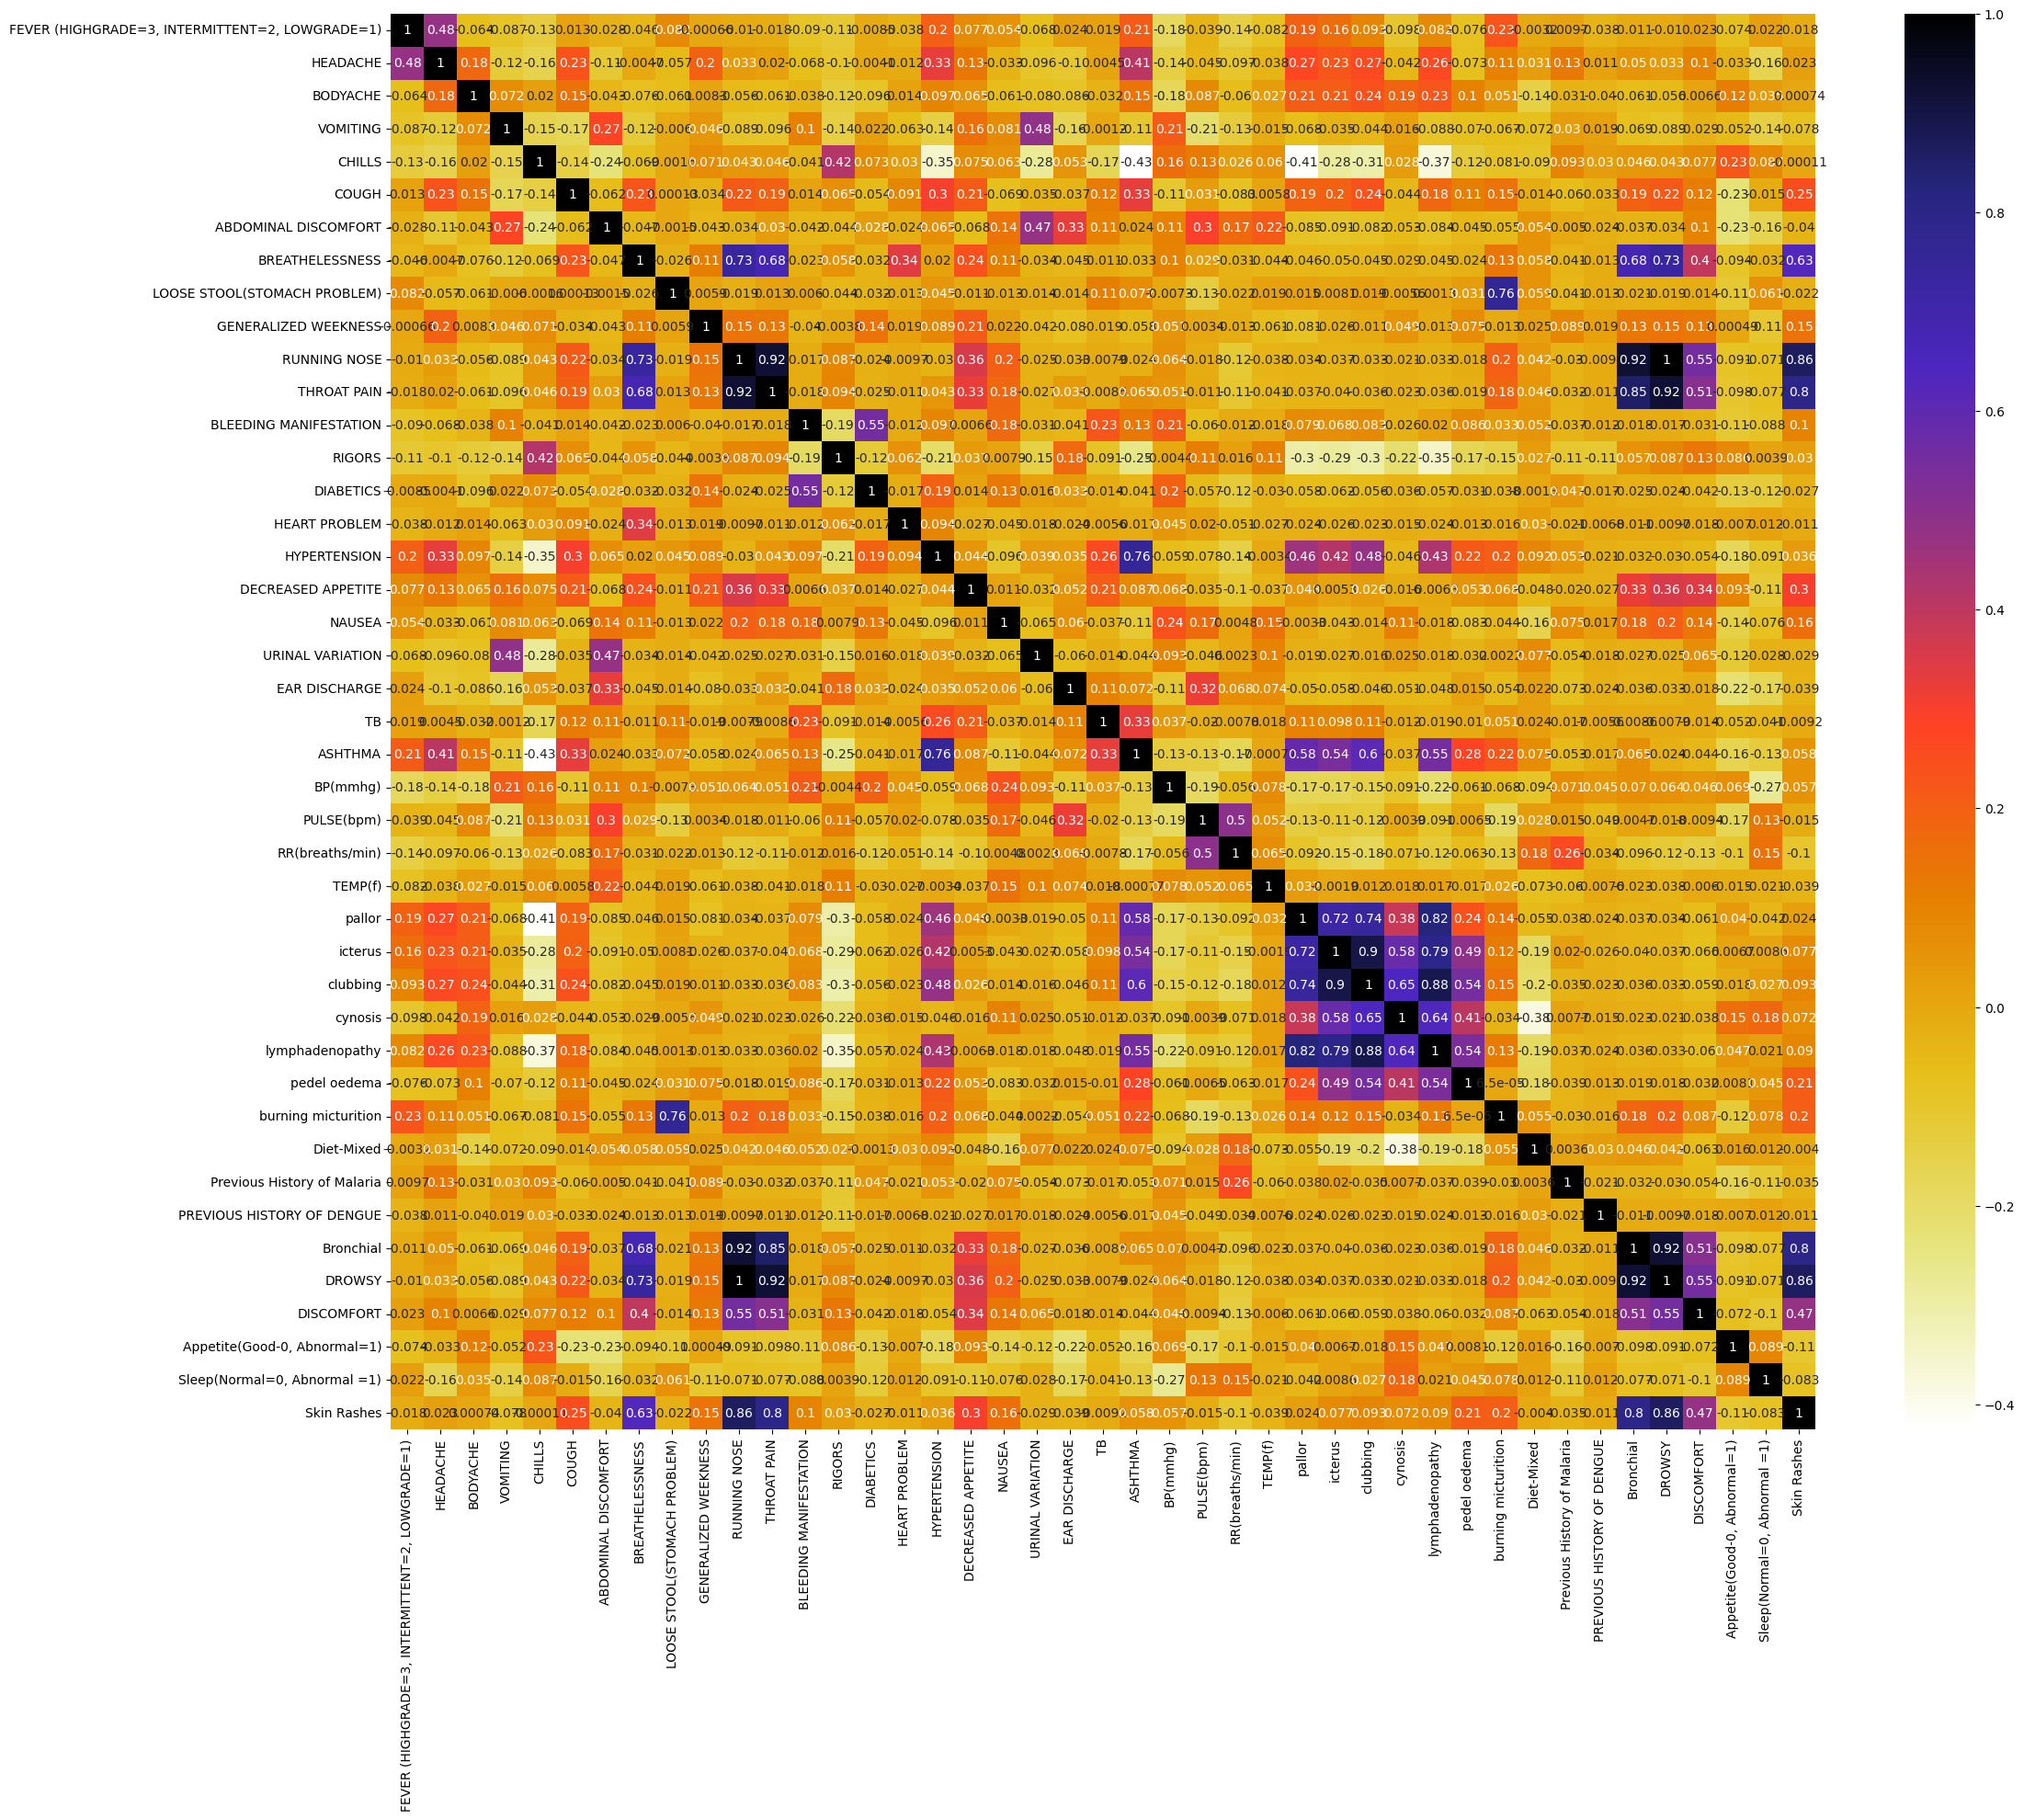

In [110]:
import seaborn as sn
plt.figure(figsize=(25,20))
corr=x_train.corr()
sn.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [111]:
def correlation(dataset,threshold):
    col_corr=set()
    col_matrix=x_train.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j])>threshold:
                col_name=col_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr
correlated_columns=correlation(x_train,0.5)
len(correlated_columns)
correlated_columns

{'ASHTHMA',
 'Bronchial',
 'DIABETICS',
 'DISCOMFORT',
 'DROWSY',
 'RUNNING NOSE',
 'Skin Rashes',
 'THROAT PAIN',
 'burning micturition',
 'clubbing',
 'cynosis',
 'icterus',
 'lymphadenopathy',
 'pallor',
 'pedel oedema'}

In [112]:
x_train=x_train.drop(correlated_columns,axis='columns')
x_test=x_test.drop(correlated_columns,axis='columns')

In [113]:
x_train.shape

(441, 28)

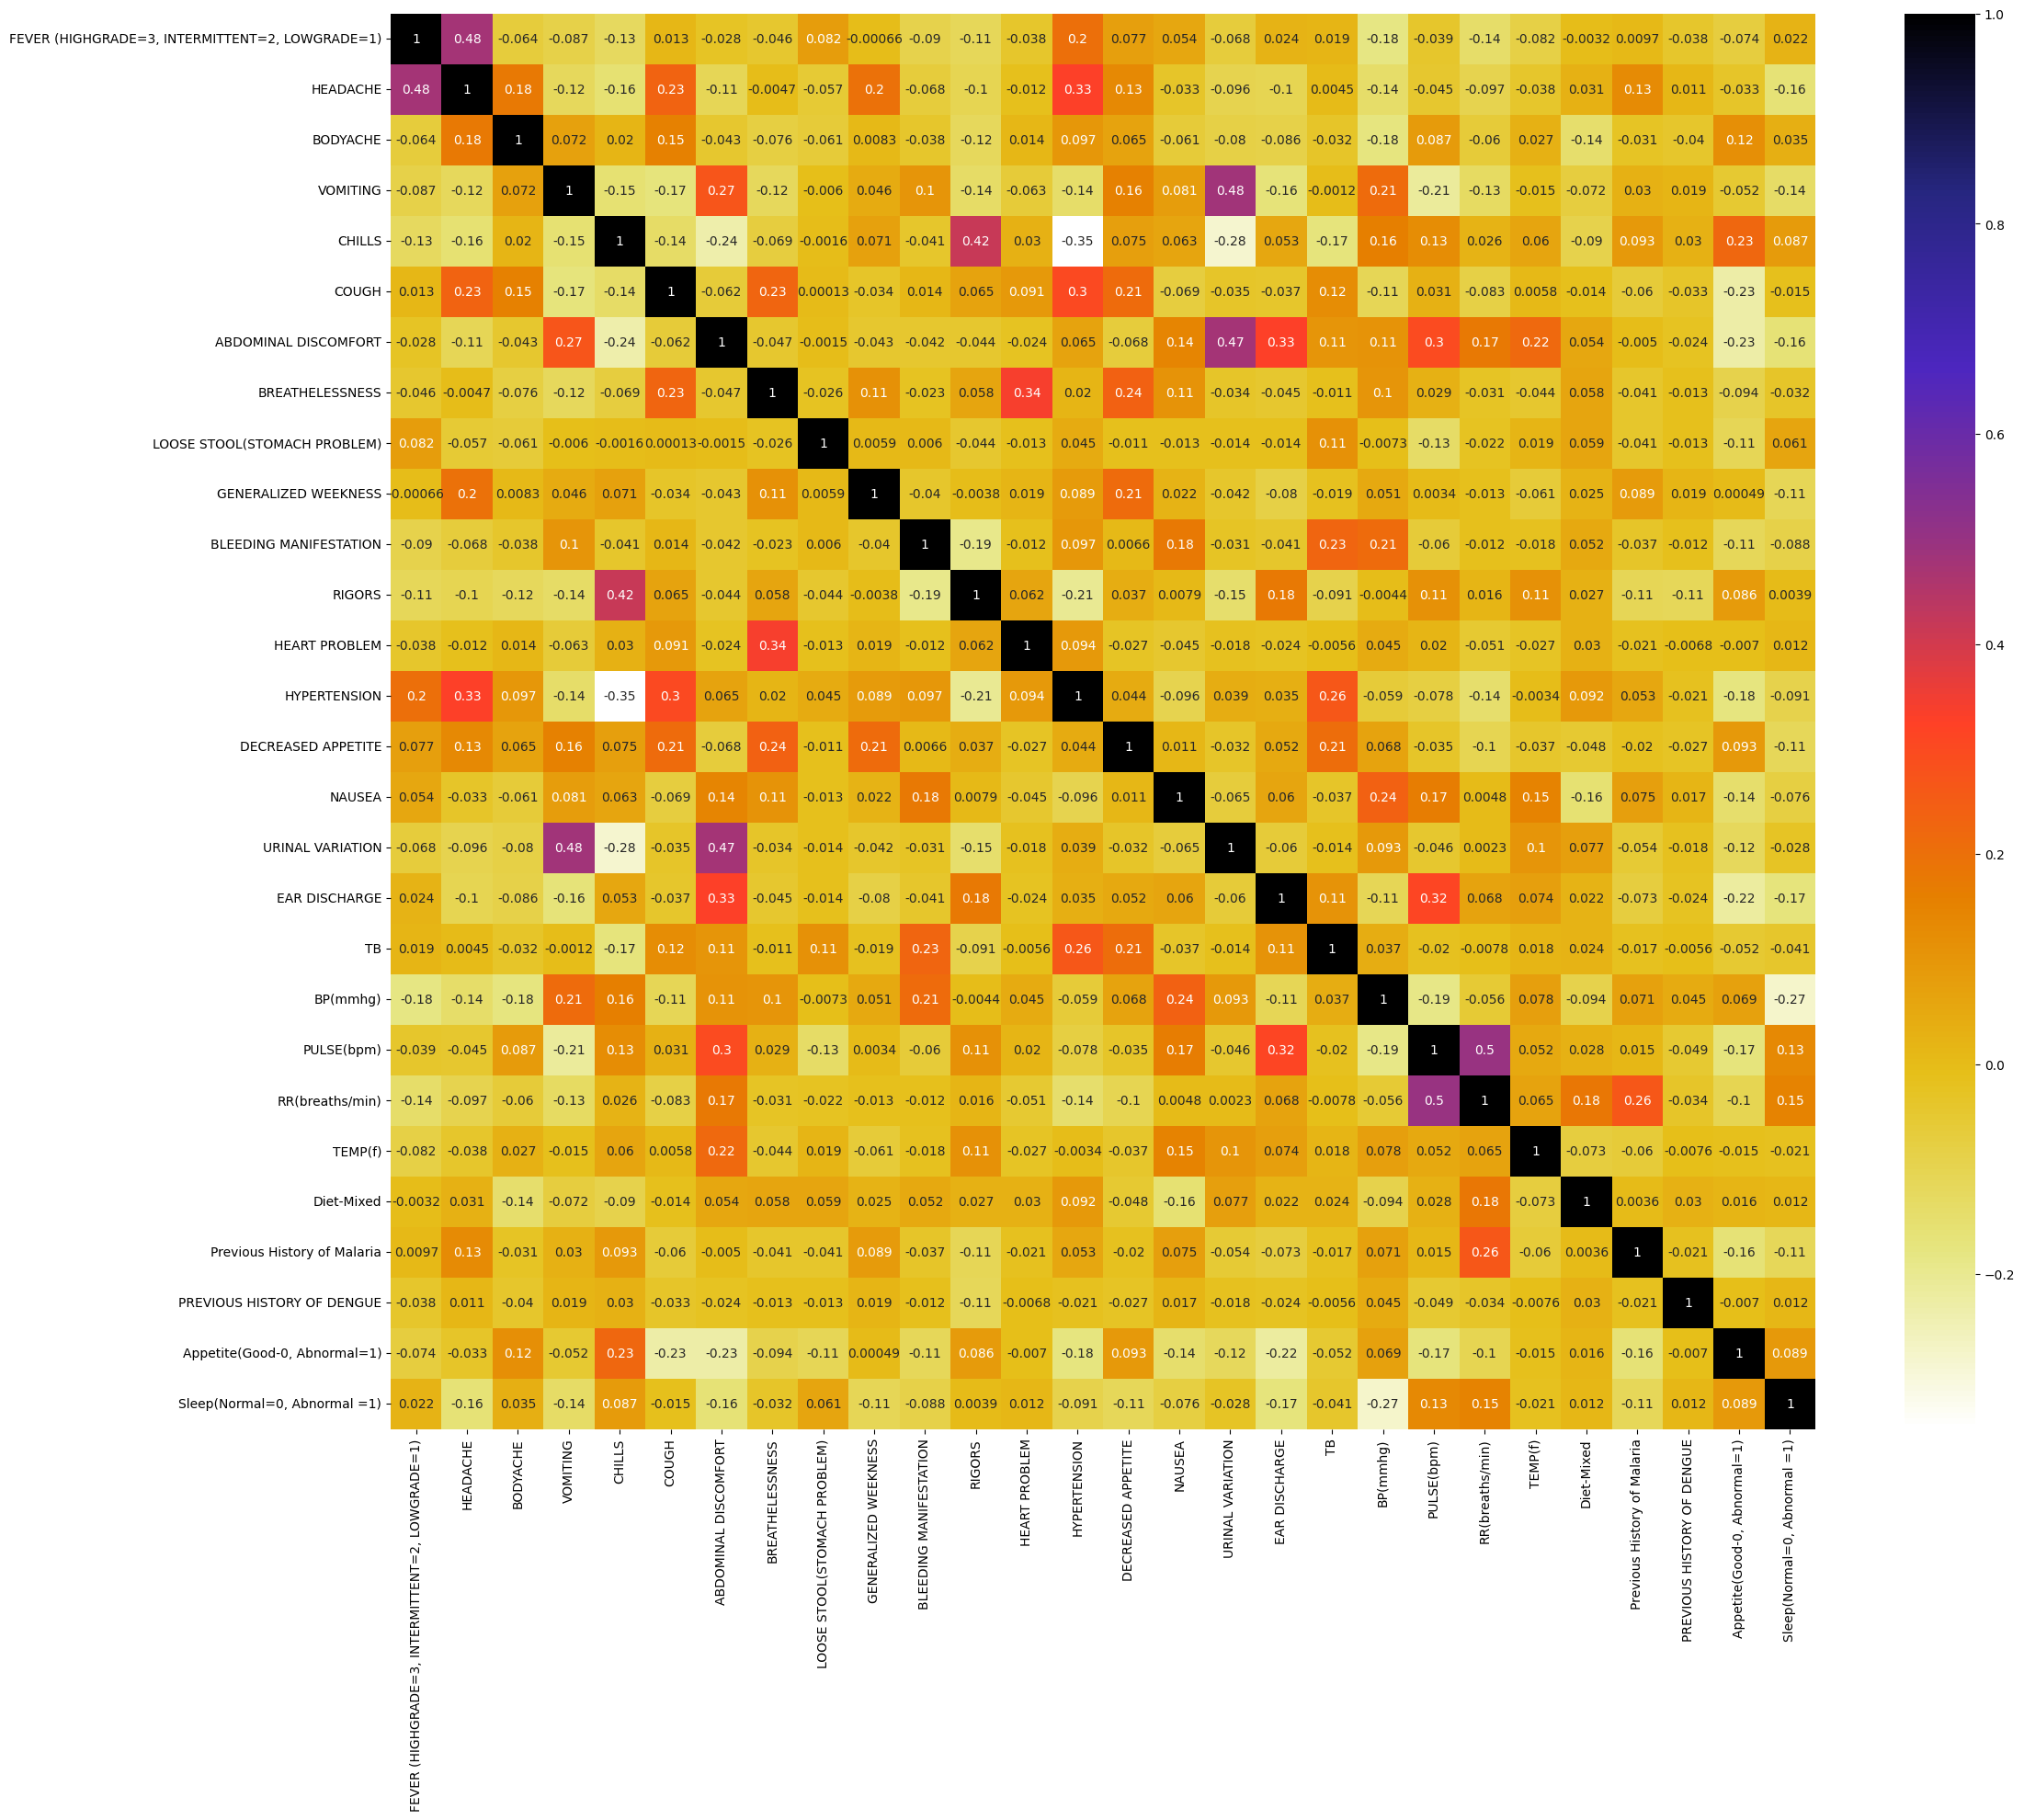

In [114]:
plt.figure(figsize=(25,20))
sn.heatmap(x_train.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [115]:
x_train.shape

(441, 28)

In [116]:
x_train.shape

(441, 28)

In [117]:
x_test.shape

(111, 28)

In [118]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
out=lof.fit_predict(x_train)
mask=out!=-1
mask

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [119]:
x_train,y_train=x_train.loc[mask, :],y_train[mask]
x_train.shape,y_train.shape

((402, 28), (402, 3))

In [120]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x_train,y_train)
model.feature_importances_

array([0.08084383, 0.07689565, 0.03258251, 0.0558789 , 0.02444644,
       0.02374353, 0.01966624, 0.00713338, 0.01431558, 0.02649744,
       0.00697341, 0.04396112, 0.00119079, 0.00951599, 0.03566374,
       0.04574519, 0.01421782, 0.02609677, 0.00064256, 0.0611758 ,
       0.09694349, 0.07740442, 0.07562316, 0.02296787, 0.01512476,
       0.00247248, 0.05449796, 0.04777918])

<Axes: >

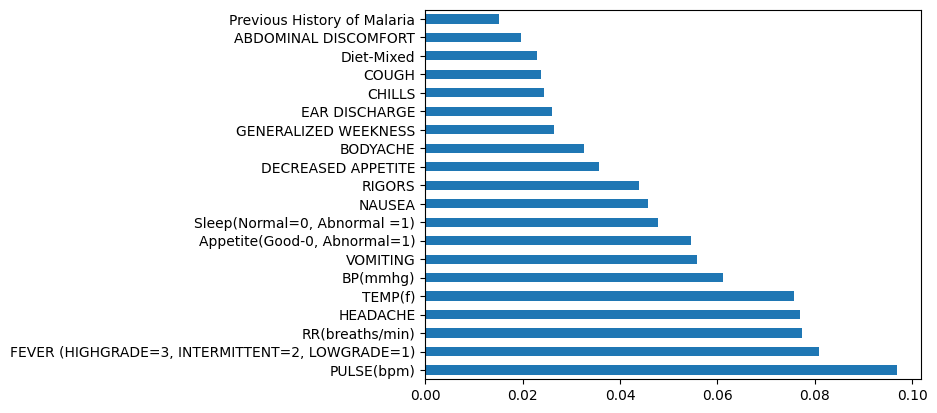

In [121]:
final_features=pd.Series(model.feature_importances_,index=x_train.columns)
final_features
final_columns=final_features.nlargest(20)
final_columns.plot(kind='barh')

In [122]:
x_train=x_train[final_columns.index]
x_test=x_test[final_columns.index]
x_train

,PULSE(bpm),"FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)",RR(breaths/min),HEADACHE,TEMP(f),BP(mmhg),VOMITING,"Appetite(Good-0, Abnormal=1)","Sleep(Normal=0, Abnormal =1)",NAUSEA,RIGORS,DECREASED APPETITE,BODYACHE,GENERALIZED WEEKNESS,EAR DISCHARGE,CHILLS,COUGH,Diet-Mixed,ABDOMINAL DISCOMFORT,Previous History of Malaria
49,70,5,16,0,100.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
339,82,5,14,0,103.0,3,1,0,0,1,1,0,0,0,0,1,0,0,0,0
445,88,4,18,1,101.0,2,0,1,1,0,1,0,0,0,0,1,0,1,0,0
80,82,7,14,0,98.6,2,1,0,0,0,1,0,0,0,0,1,0,1,1,0
301,78,4,13,1,98.7,2,1,1,0,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,80,2,18,2,98.6,2,1,0,0,1,0,1,0,0,0,1,0,1,0,1
111,107,4,18,1,98.6,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
473,78,8,14,0,98.6,2,1,1,0,0,1,0,0,0,0,1,0,1,0,0
398,88,7,18,1,98.0,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [123]:
x_train.columns

Index(['PULSE(bpm)', 'FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)',
       'RR(breaths/min)', 'HEADACHE', 'TEMP(f)', 'BP(mmhg)', 'VOMITING',
       'Appetite(Good-0, Abnormal=1)', 'Sleep(Normal=0, Abnormal =1)',
       'NAUSEA', 'RIGORS', 'DECREASED APPETITE', 'BODYACHE',
       'GENERALIZED WEEKNESS', 'EAR DISCHARGE', 'CHILLS', 'COUGH',
       'Diet-Mixed', 'ABDOMINAL DISCOMFORT', 'Previous History of Malaria'],
      dtype='object')

In [124]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((402, 20), (111, 20), (402, 3), (111, 3))

In [125]:
y_train['Plasmodium vivax'].value_counts()

Plasmodium vivax
1    206
0    196
Name: count, dtype: int64

In [126]:
x_train.shape,x_test.shape

((402, 20), (111, 20))

In [127]:

model=RandomForestClassifier(n_estimators=200,random_state=40)
pipeline=Pipeline([
    # ('pca',PCA(n_components=3)),
     ('scaler',StandardScaler()),
    ('rf',model)
])
pipeline.fit(x_train,y_train)
pipeline.score(x_test,y_test)

0.7837837837837838

In [128]:
y_pred=pipeline.predict(x_test)
cm=multilabel_confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.98      0.94      0.96        49
           2       0.92      0.81      0.86        58

   micro avg       0.93      0.88      0.90       160
   macro avg       0.93      0.88      0.90       160
weighted avg       0.93      0.88      0.90       160
 samples avg       0.67      0.65      0.65       160



In [129]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
pipeline1=Pipeline([
    # ('pca',PCA(n_components=3)),
     ('scaler',StandardScaler()),
    ('rf',model)
])
pipeline1.fit(x_train,y_train)
pipeline1.score(x_test,y_test)

0.7837837837837838

In [130]:
y_pred=pipeline1.predict(x_test)
cm=multilabel_confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.98      0.94      0.96        49
           2       0.92      0.81      0.86        58

   micro avg       0.93      0.88      0.90       160
   macro avg       0.93      0.88      0.90       160
weighted avg       0.93      0.88      0.90       160
 samples avg       0.67      0.65      0.65       160



In [131]:
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
model3=BaggingClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=500,
max_samples=2.5,
oob_score=True,
)
pipeline2=Pipeline([
#     ('smote',SMOTE(random_state=40)),
#     ('pca',PCA(n_components=10)),
    ('scaler',StandardScaler()),
    ('bag',model3),
   
])
multi_output_bag=MultiOutputClassifier(pipeline)
multi_output_bag.fit(x_train,y_train)
multi_output_bag.score(x_test,y_test)

0.7927927927927928

In [132]:
y_pred=multi_output_bag.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        53
           1       0.96      0.94      0.95        49
           2       0.92      0.84      0.88        58

   micro avg       0.92      0.89      0.90       160
   macro avg       0.92      0.89      0.90       160
weighted avg       0.92      0.89      0.90       160
 samples avg       0.68      0.66      0.66       160



In [133]:

from sklearn.ensemble import AdaBoostClassifier
model4=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,learning_rate=0.5,random_state=42)
pipeline=Pipeline([
     ('scaler',StandardScaler()),
    ('ada',model4)
])
multi_output_ada=MultiOutputClassifier(pipeline)
multi_output_ada.fit(x_train,y_train)
multi_output_ada.score(x_test,y_test)

0.6486486486486487

In [134]:
y_pred=multi_output_ada.predict(x_test)
cm=multilabel_confusion_matrix(y_test,y_pred)
cm
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        53
           1       0.78      1.00      0.88        49
           2       0.82      0.79      0.81        58

   micro avg       0.80      0.88      0.84       160
   macro avg       0.80      0.89      0.84       160
weighted avg       0.80      0.88      0.84       160
 samples avg       0.65      0.64      0.64       160



In [135]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
model6=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=42,max_features=20)
pipeline=Pipeline([
     ('scaler',StandardScaler()),
    ('gbc',model)
])
multi_output_gbc=MultiOutputClassifier(pipeline)
multi_output_gbc.fit(x_train,y_train)
multi_output_gbc.score(x_test,y_test)

0.7927927927927928

In [136]:
y_pred=multi_output_gbc.predict(x_test)
cm=multilabel_confusion_matrix(y_test,y_pred)
cm
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        53
           1       0.96      0.94      0.95        49
           2       0.92      0.84      0.88        58

   micro avg       0.92      0.89      0.90       160
   macro avg       0.92      0.89      0.90       160
weighted avg       0.92      0.89      0.90       160
 samples avg       0.68      0.66      0.66       160



In [137]:
import xgboost as xgb
model7 = xgb.XGBClassifier(
    objective="binary:logistic",  # Binary classification objective
    eval_metric="logloss",         # Logarithmic loss for binary classification
    max_depth=3,                   # Maximum depth of each tree
    learning_rate=0.1,             # Learning rate (eta)
    n_estimators=100,              # Number of boosting rounds
    seed=42                        # Random seed for reproducibility
)
pipeline=Pipeline([
     ('scaler',StandardScaler()),
    ('gbc',model7)
])
multi_output_xg=MultiOutputClassifier(pipeline)
multi_output_xg.fit(x_train,y_train)
multi_output_xg.score(x_test,y_test)

0.7027027027027027

In [138]:
x_train.columns

Index(['PULSE(bpm)', 'FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)',
       'RR(breaths/min)', 'HEADACHE', 'TEMP(f)', 'BP(mmhg)', 'VOMITING',
       'Appetite(Good-0, Abnormal=1)', 'Sleep(Normal=0, Abnormal =1)',
       'NAUSEA', 'RIGORS', 'DECREASED APPETITE', 'BODYACHE',
       'GENERALIZED WEEKNESS', 'EAR DISCHARGE', 'CHILLS', 'COUGH',
       'Diet-Mixed', 'ABDOMINAL DISCOMFORT', 'Previous History of Malaria'],
      dtype='object')

In [139]:
import gradio as gr

In [ ]:
def malaria(FEVER,EARDISCHARGE,BODYACHE,VOMITING,Appetite,COUGH,CHILLS,PreviousHistoryofMalaria,DISCOMFORT,ABDOMINALDISCOMFORT,Pulse,TEMP,RR,BP,RIGORS,NAUSEA,sleep,DECREASEDAPPETITE,GENERALIZEDWEEKNESS,DietMixed):
    dict = {
    'Yes': 1,
    'No': 0,
    'POSITIVE':1,
    'NEGATIVE':0,
    'Good':0,
    'Abnormal':1,
    'normal':0,
    'elevated':1,
    'hypertension-stage-1':2,
    'hypertension-stage-2':3,
    'hypertension-stage-3':4  
     }
    columns=['PULSE(bpm)', 'RR(breaths/min)',
       'FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)', 'HEADACHE',
       'TEMP(f)', 'BP(mmhg)', 'Appetite(Good-0, Abnormal=1)', 'VOMITING',
       'Sleep(Normal=0, Abnormal =1)', 'RIGORS', 'NAUSEA', 'BODYACHE',
       'DECREASED APPETITE', 'GENERALIZED WEEKNESS', 'EAR DISCHARGE',
       'Diet-Mixed', 'COUGH', 'CHILLS', 'ABDOMINAL DISCOMFORT',
       'Previous History of Malaria']
    Appetite=dict.get(Appetite[0])
    PreviousHistoryofMalaria=dict.get(PreviousHistoryofMalaria)
    DISCOMFORT=dict.get(DISCOMFORT)
    RIGORS=dict.get(RIGORS)
    sleep=dict.get(sleep)
    DietMixed-dict.get(DietMixed)
    BP=dict.get(BP)
    eardischarge=dict.get(eardischarge)
    input_df={
        'PULSE(bpm)':Pulse,
        'RR(breaths/min)':RR,
        'FEVER (HIGHGRADE=3, INTERMITTENT=2, LOWGRADE=1)':FEVER,
         'TEMP(f)':TEMP,
         'BP(mmhg)':BP, 
       'Appetite(Good-0, Abnormal=1)':Appetite, 
        'VOMITING':VOMITING, 
        'Sleep(Normal=0, Abnormal =1)':sleep,
        'RIGORS':RIGORS,
        'NAUSEA':NAUSEA, 
        'BODYACHE':BODYACHE, 
       'DECREASED APPETITE':DECREASEDAPPETITE, 
        'GENERALIZED WEEKNESS':GENERALIZEDWEEKNESS, 
        'EAR DISCHARGE':eardischarge,
        'Diet-Mixed':DietMixed,
        'COUGH':COUGH,
        'CHILLS':CHILLS, 
        'ABDOMINAL DISCOMFORT':ABDOMINALDISCOMFORT,
        'Previous History of Malaria':PreviousHistoryofMalaria, 
       }
    input_data=pd.DataFrame([input_df],columns=columns)
    predicted=multi_output_gbc.predict(input_data)
    return predicted.to_string()
        
iface=gr.Interface(fn=malaria,inputs=[
    gr.Slider(0,100,label='Fever(days)'),
    gr.Slider(0,100,label='Headache(days)'),
    gr.Slider(0,100,label='Bodyache(days)'),
    gr.Slider(0,100,label='Vommiting(days)'),
    gr.CheckboxGroup(['Good','Abnormal'],label='Apetite'),
    gr.Slider(0,150,label='COUGH'),
    gr.Slider(0,100,label='Chills(days'),
    gr.Dropdown(['POSITIVE','NEGATIVE'],label='Previous History(Malaria)'),
    gr.Dropdown(['Yes','No'],label='DISCOMFORT'),
    gr.Slider(0,150,label='Abdominal Discomfort'),
    gr.Slider(40,200,label='Pulse(bpm)'),
    gr.Slider(75,110,label='Temp(body)(F)'),
    gr.Slider(10,100,label='RR(breadths/min)'),          
    gr.Dropdown(['normal','elevated','hypertension-stage-1','hypertension-stage-2','hypertension-stage-3'],label='Blood Pressure(types)'),
    gr.Dropdown(['Yes','No'],label='RIGORS'),
    gr.Slider(0,10,label='NAUSEA'),
    gr.CheckboxGroup(['Normal','Abnormal'],label='Sleep'),
    gr.CheckboxGroup([0,1],label='Decreased Apetite'),   
    gr.Slider(0,10,label='Weekness') ,
    gr.Dropdown(['Yes','No'],label='DIET MIXED')
                
],outputs='text')
iface.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packag